In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_excel('dataset demo.xlsx')
texts = df['text'].astype(str)
df

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl,Unnamed: 13
0,https://p19-common-sign-sg.tiktokcdn-us.com/to...,wawan.626,ketika rakyat menderita disitula DPR joget² #d...,1350.0,679.0,119100.0,81.0,23.0,suara asli - wanwan,wanwan,true,2025-08-30T07:32:41.000Z,https://www.tiktok.com/@wawan.626/video/754427...,NaN
1,https://p16-common-sign-sg.tiktokcdn-us.com/to...,zeeyn36,#demo #dpr #demohariini #fyp,224600.0,11300.0,3800000.0,2835.0,15.0,suara asli - EVELYN,EVELYN,true,2025-08-31T00:32:38.000Z,https://www.tiktok.com/@zeeyn36/video/75445410...,NaN
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,yourmoneylooser,sok iyere lu... bukannya merenung malah berkic...,603900.0,22900.0,11400000.0,9411.0,30.0,original sound - MindScope,MindScope,true,2025-08-31T00:52:03.000Z,https://www.tiktok.com/@yourmoneylooser/video/...,NaN
3,https://p16-common-sign-useast2a.tiktokcdn-us....,faktualnews,"Kondisi Rumah Uya Kuya Setelah Dijarah Massa, ...",4040.0,1877.0,1600000.0,233.0,57.0,Powerful songs like action movie music,Tansa,false,2025-08-31T09:56:39.000Z,https://www.tiktok.com/@faktualnews/video/7544...,NaN
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,myneighbouristotoro3,#demo #dpr #fyp,9523.0,509.0,245800.0,302.0,15.0,where we are slowed,ourfeelings,true,2025-08-31T00:47:00.000Z,https://www.tiktok.com/@myneighbouristotoro3/v...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,https://p16-common-sign-useastred.tiktokcdn-eu...,pandeglangeksis,Warga Pandeglang menumpahkan sampah di depan k...,1000000.0,81900.0,26500000.0,13300.0,39100.0,25,suara asli - PANDEGLANG EKSIS SEMAKIN EKSIS,PANDEGLANG EKSIS SEMAKIN EKSIS,true,2025-08-20T05:09:22.000Z,https://www.tiktok.com/@pandeglangeksis/video/...
2228,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,percaya.gakpercaya,BAHAYA!! KANG DEDI MULYADI TURUN TEMUI PENDEMO...,37900.0,872.0,1400000.0,1293.0,2849.0,138,suara asli - Percaya Gak Percaya,Percaya Gak Percaya,true,2025-08-30T01:51:04.000Z,https://www.tiktok.com/@percaya.gakpercaya/vid...
2229,https://p16-common-sign-sg.tiktokcdn-us.com/to...,garuda.siwa.infot,"Ahmad Sahroni Minta Maaf, Tapi Kabur Tak Mau P...",18900.0,248.0,1200000.0,555.0,1036.0,15,suara asli - Garuda Siwa Infotainment,Garuda Siwa Infotainment,true,2025-08-31T10:15:00.000Z,https://www.tiktok.com/@garuda.siwa.infot/vide...
2230,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,bct95784,#viraldemo #demohariini #livedemohariini #fyp ...,2131.0,282.0,131200.0,98.0,192.0,58,suara asli - bctt,bctt,true,2025-08-31T05:51:00.000Z,https://www.tiktok.com/@bct95784/video/7544623...


Preprocessing Data

In [4]:
stemmer = StemmerFactory().create_stemmer()
stop_words = set(stopwords.words('indonesian')) # menggunakan stopwords bahasa Indonesia

def clean_text(t):
    t = t.lower()
    t = re.sub(r"http\S+|www\S+|https\S+", '', t)
    t = re.sub(r'\d+', '', t)
    t = t.translate(str.maketrans('', '', string.punctuation))
    t = t.strip()
    tokens = t.split()
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words] # stemming menggunakan Sastrawi
    return " ".join(tokens)

df['clean'] = texts.apply(clean_text)

In [5]:
vectorizer = CountVectorizer(max_df=0.9, min_df=5)
dtm = vectorizer.fit_transform(df['clean'])

Lakukan Exploratory Data Analysis pada dataset tersebut

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   authorMeta.avatar        2232 non-null   object 
 1   authorMeta.name          2232 non-null   object 
 2   text                     2192 non-null   object 
 3   diggCount                2229 non-null   float64
 4   shareCount               2229 non-null   float64
 5   playCount                2229 non-null   float64
 6   commentCount             2229 non-null   float64
 7   videoMeta.duration       2229 non-null   float64
 8   musicMeta.musicName      2227 non-null   object 
 9   musicMeta.musicAuthor    2201 non-null   object 
 10  musicMeta.musicOriginal  2216 non-null   object 
 11  createTimeISO            2229 non-null   object 
 12  webVideoUrl              2229 non-null   object 
 13  Unnamed: 13              1345 non-null   object 
 14  clean                   

In [8]:
# mengecek missing value
df.isna().sum()

,0
authorMeta.avatar,0
authorMeta.name,0
text,40
diggCount,3
shareCount,3
playCount,3
commentCount,3
videoMeta.duration,3
musicMeta.musicName,5
musicMeta.musicAuthor,31


Dari informasi yang kita dapatkan pada data terdapat data yang hilang pada kolom Unnamed:13 sebanyak 887 missing value

In [9]:
# cek statiscial summary
df.describe()

,diggCount,shareCount,playCount,commentCount,videoMeta.duration
count,2.229000e+03,2.229000e+03,2.229000e+03,2229.000000,2229.000000
mean,8.022401e+04,7.150215e+03,1.470335e+06,1988.077613,3515.605204
std,2.892684e+05,4.534282e+04,4.691080e+06,6273.774328,16021.265052
min,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000
25%,1.020000e+02,1.600000e+01,4.977000e+03,6.000000,18.000000
50%,4.179000e+03,3.020000e+02,1.598000e+05,168.000000,64.000000
75%,4.850000e+04,2.619000e+03,1.100000e+06,1240.000000,1283.000000
max,6.900000e+06,1.500000e+06,1.291000e+08,119700.000000,504400.000000


In [10]:
# Transformasi log
df['dig'] = np.log1p(df['diggCount'])  # log(1 + x) untuk hindari log(0)
df['share'] = np.log1p(df['shareCount'])
df['play'] = np.log1p(df['playCount'])
df['comment'] = np.log1p(df['commentCount'])
df['videoDuration'] = np.log1p(df['videoMeta.duration'])

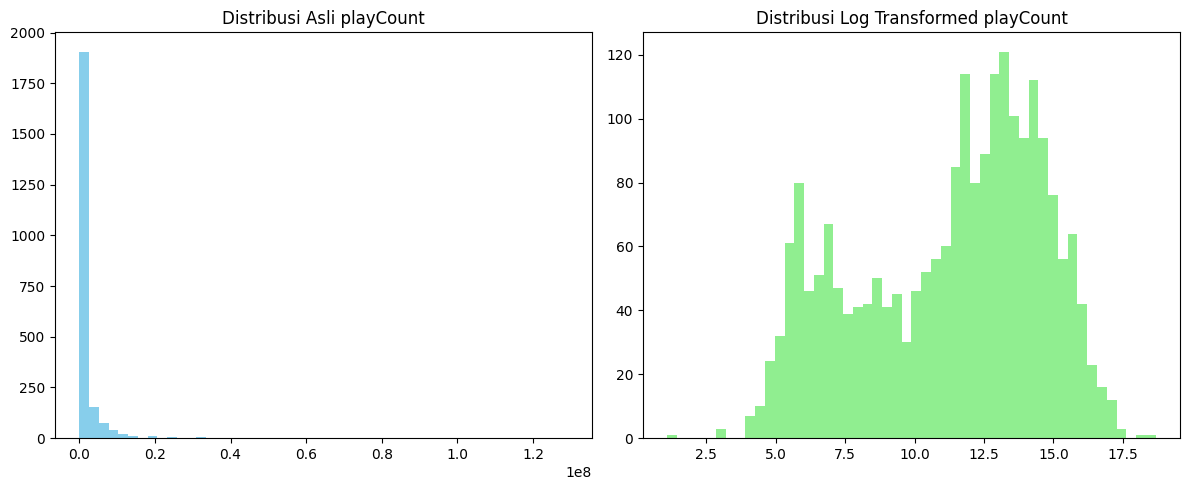

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(df['playCount'], bins=50, color='skyblue')
ax[0].set_title('Distribusi Asli playCount')

ax[1].hist(df['play'], bins=50, color='lightgreen')
ax[1].set_title('Distribusi Log Transformed playCount')

plt.tight_layout()
plt.show()

In [12]:
# cek statiscial summary pada columns yang bermasalah
df[['dig','share','play','comment','videoDuration']].describe()

,dig,share,play,comment,videoDuration
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,7.867942,5.380895,11.258362,4.725191,4.908070
std,3.511694,3.258388,3.319020,2.984371,2.741227
min,0.000000,0.000000,1.098612,0.000000,0.000000
25%,4.634729,2.833213,8.512783,1.945910,2.944439
50%,8.338067,5.713733,11.981685,5.129899,4.174387
75%,10.789340,7.870930,13.910822,7.123673,7.157735
max,15.747032,14.220976,18.676098,11.692752,13.131127


 Observasi:

Secara keseluruhan, nilai minimum dan maksimum untuk setiap kolom logaritma dari dig, share, play, comment dan videoduration terlihat masuk akal, tidak menunjukkan outlier ekstrem.

Distribusi mendekati normal dapat diamati dari nilai mean yang mendekati median (50%) pada sebagian besar kolom:

dig: mean = 7.86, median = 8.33,

share: mean = 5.38, median = 5.71,

play: mean = 11.25, median = 11.97,

comment: mean = 4.72, median = 5.13,

videoDuration: mean = 4.90, median = 4.17

Ini menunjukkan bahwa data bersifat simetris dan tidak terlalu condong (skewed) ke kiri atau ke kanan.

Ukuran penyebaran (standar deviasi) terlihat cukup rendah di semua kolom, menandakan variabilitas data yang relatif kecil dan stabil antar pengamatan, terutama pada kolom omega_butir_log dan omega_berat_log.

In [13]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
         df[column].fillna( df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
         df[column].fillna( df[column].mean(), inplace=True)

/tmp/ipython-input-43380796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna( df[column].mode()[0], inplace=True)
/tmp/ipython-input-43380796.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
# cek kembali missing value
df.isna().sum()

,0
authorMeta.avatar,0
authorMeta.name,0
text,0
diggCount,0
shareCount,0
playCount,0
commentCount,0
videoMeta.duration,0
musicMeta.musicName,0
musicMeta.musicAuthor,0


In [15]:
# Mengecek apakah ada duplicate di seluruh colums
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 185


In [ ]:
# Handling duplicate
df = df.drop_duplicates()

In [ ]:
# Mengecek lagi apakah ada duplicate di seluruh colums
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 0


Topic Modeling dengan metode Latent Dirichlet Allocation (LDA)

In [16]:
n_topics = 7
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

Topic Modeling (LDA)

In [17]:
def show_topics(model, vec, top_n=10):
    words = vec.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topik {idx+1}:")
        top = topic.argsort()[:-top_n - 1:-1]
        print(", ".join([words[i] for i in top]))
        print()

show_topics(lda_model, vectorizer, top_n=10)

Topik 1:
dpr, jakarta, anggota, rumah, sahroni, massa, jarah, urbach, minggu, nafa

Topik 2:
dpr, demo, gedung, uya, kuya, massa, demodpr, bakar, rumah, jakarta

Topik 3:
demo, dpr, fyp, indonesia, demodpr, viral, rakyat, jakarta, dprri, agustus

Topik 4:
the, sniper, in, and, to, of, for, affan, fyp, was

Topik 5:
ojol, affan, demo, brimob, perintah, rakyat, aksi, fyp, kurniawan, dpr

Topik 6:
fyp, demonslayer, bikin, faktakilat, fakta, gak, demonstration, capcut, komen, kaget

Topik 7:
demo, fyp, kwitang, bubarkandpr, demodpr, jakarta, demoagustus, demohariini, fyppppppppppppppppppppppp, foryou



Data Visualisasi

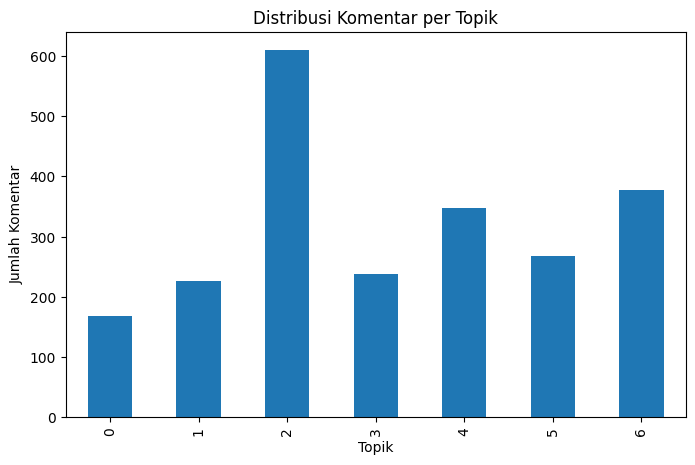

In [18]:
topic_dist = lda_model.transform(dtm)
df['DominantTopic'] = topic_dist.argmax(axis=1)

topic_counts = df['DominantTopic'].value_counts().sort_index()
plt.figure(figsize=(8,5))
topic_counts.plot(kind='bar')
plt.title("Distribusi Komentar per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Komentar")
plt.show()